In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import warnings

# To suppress all warnings
warnings.filterwarnings('ignore')

In [5]:
excel_file_path = '/content/drive/MyDrive/data_opt.xlsx'
df = pd.read_excel(excel_file_path)
df_1 = pd.read_excel(excel_file_path)

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
df = pd.DataFrame(scaled_data, columns=df.columns)

In [6]:
target_variables = ['BFG','LDG','COG'] #BFG,LDG,COG

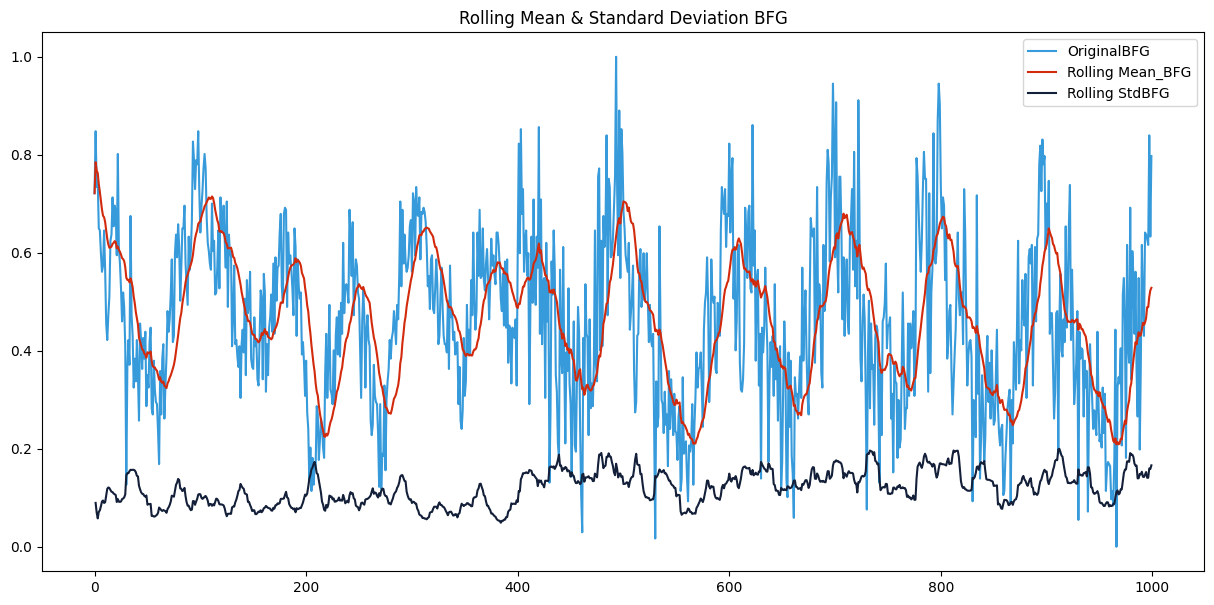

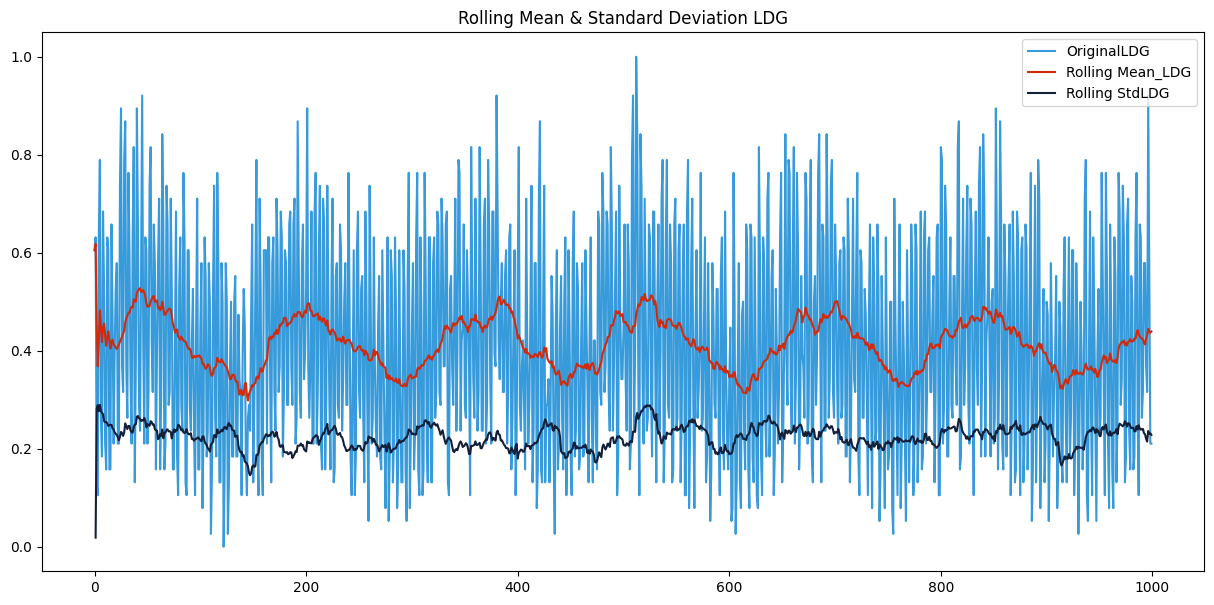

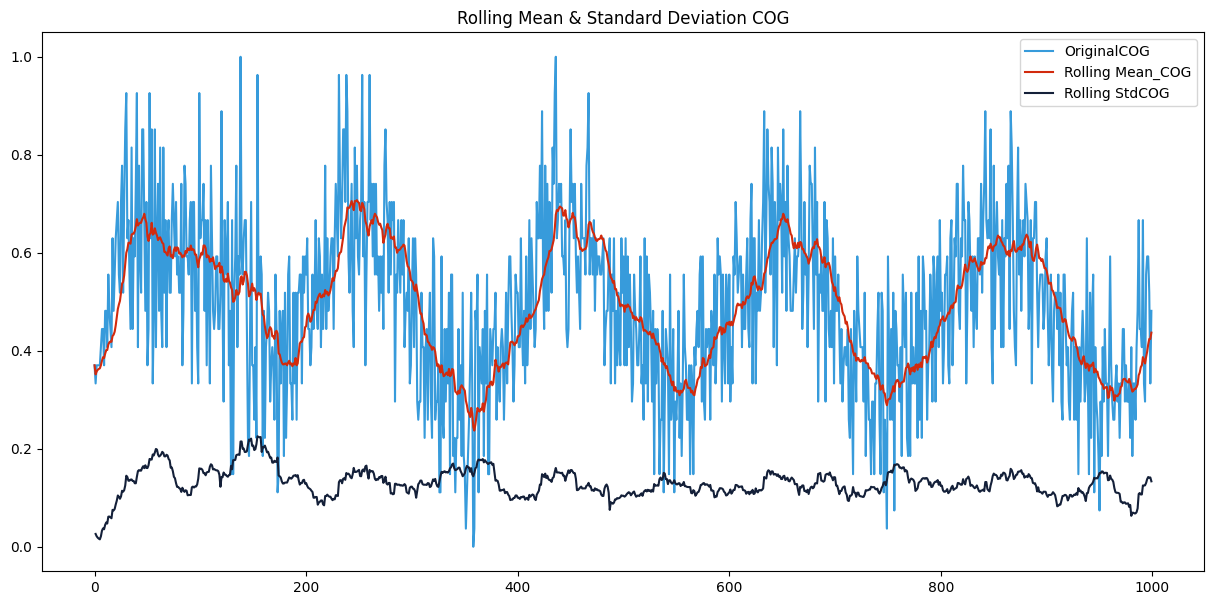

In [8]:
for target_variable in target_variables:
  #Determine rolling statistics
  df[f"rolling_avg_{target_variable}"] = df[target_variable].rolling(window=20,min_periods=1).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
  df[f"rolling_std_{target_variable}"] = df[target_variable].rolling(window=20,min_periods=1).std()

  #Plot rolling statistics
  plt.figure(figsize=(15,7))
  plt.plot(df[target_variable], color='#379BDB', label=f'Original{target_variable}')
  plt.plot(df[f"rolling_avg_{target_variable}"], color='#D22A0D', label=f'Rolling Mean_{target_variable}')
  plt.plot(df[f"rolling_std_{target_variable}"], color='#142039', label=f'Rolling Std{target_variable}')
  plt.legend(loc='best')
  plt.title(f'Rolling Mean & Standard Deviation {target_variable}')
  plt.show(block=False)

In [9]:
df

,period,BFG,LDG,COG,rolling_avg_BFG,rolling_std_BFG,rolling_avg_LDG,rolling_std_LDG,rolling_avg_COG,rolling_std_COG
0,0.000000,0.721519,0.605263,0.370370,0.721519,NaN,0.605263,NaN,0.370370,NaN
1,0.001001,0.848101,0.631579,0.333333,0.784810,0.089507,0.618421,0.018608,0.351852,0.026189
2,0.002002,0.734177,0.131579,0.370370,0.767932,0.069716,0.456140,0.281386,0.358025,0.021383
3,0.003003,0.746835,0.105263,0.370370,0.762658,0.057892,0.368421,0.289075,0.361111,0.018519
4,0.004004,0.649789,0.631579,0.370370,0.740084,0.071144,0.421053,0.276629,0.362963,0.016563
...,...,...,...,...,...,...,...,...,...,...
995,0.995996,0.628692,0.315789,0.592593,0.489030,0.140849,0.431579,0.214709,0.398148,0.137993
996,0.996997,0.616034,0.921053,0.592593,0.489030,0.140849,0.444737,0.236287,0.412963,0.142320
997,0.997998,0.839662,0.578947,0.518519,0.510338,0.159784,0.438158,0.230252,0.424074,0.141403
998,0.998999,0.632911,0.210526,0.333333,0.523207,0.158716,0.436842,0.231535,0.424074,0.141403


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['period'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['BFG'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['LDG'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['COG'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['period'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['BFG'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['LDG'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['COG'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['period', 'BFG'], ['BFG', 'LDG'], ['LDG', 'COG'], ['COG', 'rolling_avg_BFG']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['period', 'BFG', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['period', 'LDG', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['period', 'COG', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['period', 'rolling_avg_BFG', None], **{})
chart

In [ ]:
#df['rolling_avg_BFG'].dropna().shape

(1000,)

In [10]:
import copy
# Define the number of past periods to consider (p)
p = 8
data=copy.copy(df)
# Define the target variable (e.g., 'BFG' in this case)
#target_variable = 'rolling_avg_BFG'
#target_variable = 'BFG'

# Create lag features for the past p periods
for target_variable in target_variables:
  for lag in range(1, p + 1):
      data[f'{target_variable}_lag_{lag}'] = data[target_variable].shift(lag)
data=data.dropna()
# Split the data into features (X) and target variable (y)
#X = data[[f'{target_variable}_lag_{lag}' for lag in range(1, p + 1)]]
#y = data[target_variable]
#print(X,y)

In [19]:
list(data.columns)

['period',
 'BFG',
 'LDG',
 'COG',
 'rolling_avg_BFG',
 'rolling_std_BFG',
 'rolling_avg_LDG',
 'rolling_std_LDG',
 'rolling_avg_COG',
 'rolling_std_COG',
 'BFG_lag_1',
 'BFG_lag_2',
 'BFG_lag_3',
 'BFG_lag_4',
 'BFG_lag_5',
 'BFG_lag_6',
 'BFG_lag_7',
 'BFG_lag_8',
 'LDG_lag_1',
 'LDG_lag_2',
 'LDG_lag_3',
 'LDG_lag_4',
 'LDG_lag_5',
 'LDG_lag_6',
 'LDG_lag_7',
 'LDG_lag_8',
 'COG_lag_1',
 'COG_lag_2',
 'COG_lag_3',
 'COG_lag_4',
 'COG_lag_5',
 'COG_lag_6',
 'COG_lag_7',
 'COG_lag_8']

In [21]:
target_variable = 'BFG'

In [22]:
# Split the data into training and testing sets
train_size = int(0.9 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

X_train = train_data[[f'{target_variable}_lag_{lag}' for lag in range(1, p + 1)]]
X_test = test_data[[f'{target_variable}_lag_{lag}' for lag in range(1, p + 1)]]
y_train = train_data[target_variable]
y_test = test_data[target_variable]

In [ ]:
# feel free to do some hyperparamter tuning,
# these parameters were picked randomly
from lightgbm import LGBMRegressor
lgb_params = {
    'n_jobs': 1,
    'max_depth': 4,
    'min_data_in_leaf': 10,
    'subsample': 0.9,
    'n_estimators': 80,
    'learning_rate': 0.1,
    'colsample_bytree': 0.9,
    'boosting_type': 'gbdt'
}
lgb_l2 = LGBMRegressor(objective='regression', **lgb_params)
lgb_l2.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


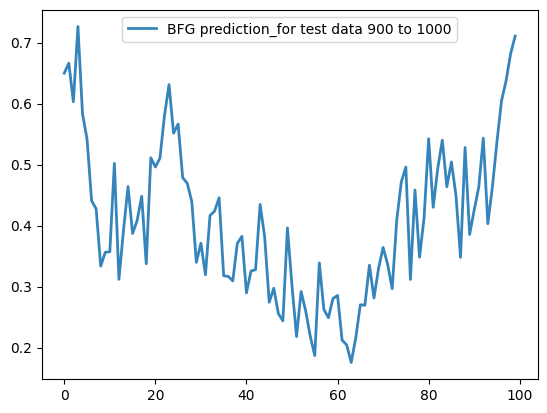

In [29]:
plt.plot(lgb_l2.predict(X_test),
         label=f'{target_variable} prediction_for test data 900 to 1000', alpha=0.9, linewidth=2)
plt.legend()

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


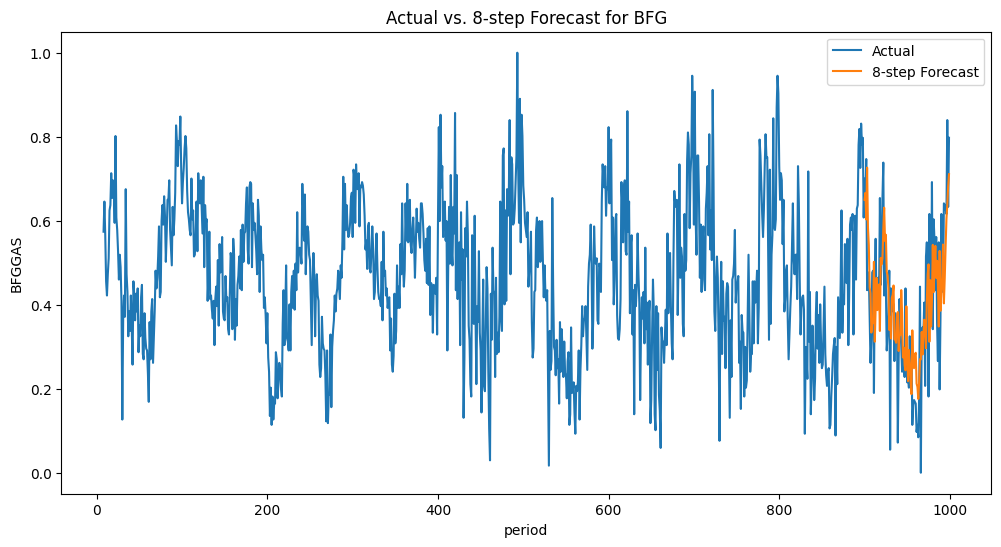

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(data[target_variable], label='Actual')
plt.plot(np.arange(900,1000),lgb_l2.predict(X_test), label='8-step Forecast')
plt.xlabel('period')
plt.ylabel(f'{target_variable}GAS')
plt.legend()
plt.title(f'Actual vs. 8-step Forecast for {target_variable}')
plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


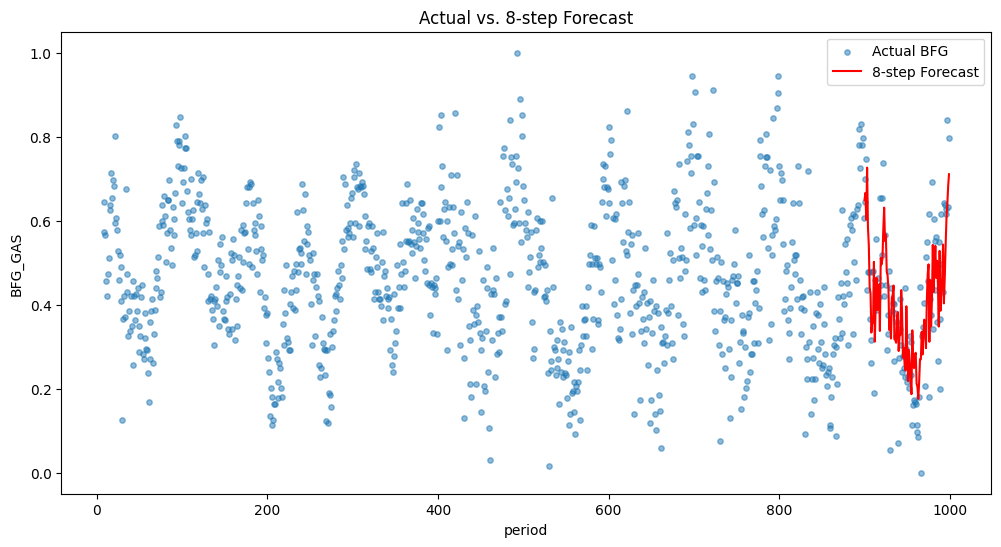

In [31]:
plt.figure(figsize=(12, 6))
#plt.plot(data.index, data['BFG'], label='Actual')
plt.scatter(data.index, data[target_variable], label=f'Actual {target_variable}',s=15,alpha=0.5)
#plt.plot(data['rolling_avg_BFG'], label='window_Actual')
plt.plot(np.arange(900,1000),lgb_l2.predict(X_test), label='8-step Forecast',color='red')
plt.xlabel('period')
plt.ylabel(f'{target_variable}_GAS')
plt.legend()
plt.title(f'Actual vs. 8-step Forecast')
plt.show()

In [ ]:
quantile_alphas = [0.01, 0.99,0.5,0.1,0.9]

lgb_quantile_alphas = {}
for quantile_alpha in quantile_alphas:
    # to train a quantile regression, we change the objective parameter and
    # specify the quantile value we're interested in
    lgb = LGBMRegressor(objective='quantile', alpha=quantile_alpha, **lgb_params)
    lgb.fit(X_train, y_train)
    lgb_quantile_alphas[quantile_alpha] = lgb

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


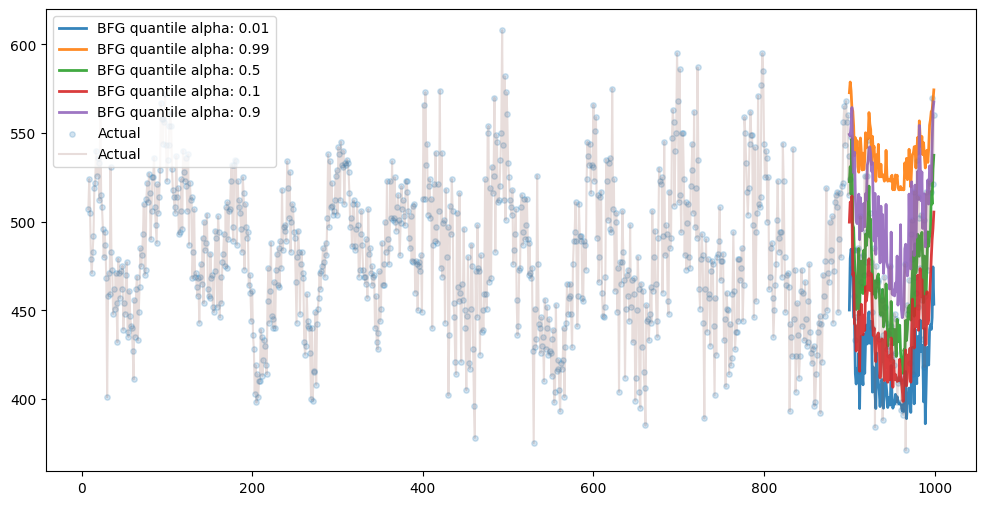

In [ ]:
plt.figure(figsize=(12, 6))
for quantile_alpha, lgb in lgb_quantile_alphas.items():
    plt.plot(np.arange(900,1000), lgb.predict(X_test),
             label='BFG quantile alpha: {}'.format(quantile_alpha),
             alpha=0.9, linewidth=2)
plt.scatter(data.index, data[target_variable], label='Actual',s=15,alpha=0.2)
plt.plot(data.index, data[target_variable], label='Actual',alpha=0.2)
# Create the legend
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, lgb_l2.predict(X_test))
MSE = mean_squared_error(y_test, lgb_l2.predict(X_test))
print(MAE,MSE,MSE**(0.5))

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
0.11382521900460196 0.020679534729293462 0.14380380637971119


In [ ]:
print(np.sqrt(MSE))

0.14380380637971119

In [4]:
import gurobipy as gp
from gurobipy import GRB

# Create a new Gurobi model
model = gp.Model("Production_Planning")

# Decision variables
x1 = model.addVar(vtype=GRB.INTEGER, name="x1")
x2 = model.addVar(vtype=GRB.INTEGER, name="x2")
y1 = model.addVar(vtype=GRB.BINARY, name="y1")
y2 = model.addVar(vtype=GRB.BINARY, name="y2")

# Objective function
model.setObjective(10 * x1 + 15 * x2, sense=GRB.MAXIMIZE)

# Constraints
model.addConstr(2 * x1 + 3 * x2 <= 40, "Labor")
model.addConstr(4 * x1 + 2 * x2 <= 50, "RawMaterial")
model.addConstr(x1 <= 1000 * y1, "Binary1")
model.addConstr(x2 <= 800 * y2, "Binary2")

# Optimize the model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal Solution: x1 = {x1.x}, x2 = {x2.x}, Z = {model.objVal}")
else:
    print("No solution found.")

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 4 rows, 4 columns and 8 nonzeros
Model fingerprint: 0xe37cf410
Variable types: 0 continuous, 4 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+01, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 5e+01]
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective 135.0000000
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)
Found heuristic solution: objective 140.0000000

Root relaxation: objective 2.000000e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds 